In [1]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import entropy as cluster_entropy
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
banana = pd.read_csv("banana  (with class label).csv")
banana

,x,y,class
0,0.228,0.559,1
1,0.216,0.528,1
2,0.221,0.552,1
3,0.215,0.538,1
4,0.224,0.548,1
...,...,...,...
4806,0.507,0.269,2
4807,0.526,0.237,2
4808,0.513,0.233,2
4809,0.506,0.221,2


In [3]:
banana.apply(lambda x:np.sum(x==' '))

x        0
y        0
class    0
dtype: int64

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(banana)
x_scaled = scaler.transform(banana)
banana = pd.DataFrame(x_scaled,columns=banana.columns)
banana

,x,y,class
0,0.066667,0.519004,0.0
1,0.049275,0.478375,0.0
2,0.056522,0.509830,0.0
3,0.047826,0.491481,0.0
4,0.060870,0.504587,0.0
...,...,...,...
4806,0.471014,0.138925,1.0
4807,0.498551,0.096986,1.0
4808,0.479710,0.091743,1.0
4809,0.469565,0.076016,1.0


In [5]:
X = banana.drop(labels=['class'],axis=1)
banana_class = banana['class'].values

In [6]:
Start = time.time()

kmeans = KMeans(n_clusters=2,random_state=42).fit(X)
y_pred = kmeans.fit_predict(X)
print("分群結果: ")
print(y_pred)

End = time.time()
print("運行時間: ",End-Start)

分群結果: 
[1 1 1 ... 0 0 0]
運行時間:  0.12623858451843262


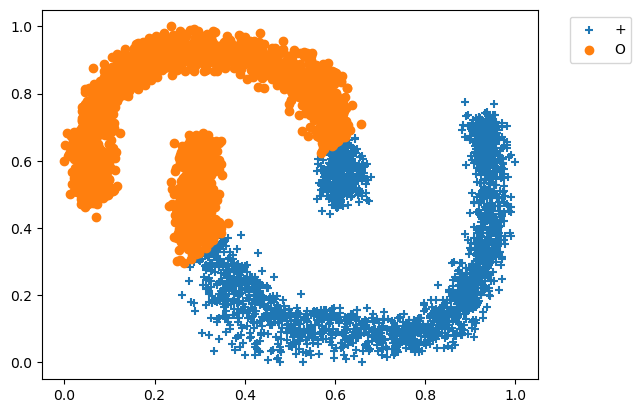

In [7]:
banana['cluster'] = y_pred
plt.scatter(banana[banana['cluster'] == 0]['x'], banana[banana['cluster'] == 0]['y'], marker='+', label='+')
plt.scatter(banana[banana['cluster'] == 1]['x'], banana[banana['cluster'] == 1]['y'], marker='o', label='O')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")
plt.show()

In [8]:
cluster_centers = np.array([X[y_pred == i].mean(axis=0) for i in range(4)])

distances_squared = np.sum((X - cluster_centers[y_pred]) ** 2, axis=1)

sse = np.sum(distances_squared)

print('SSE =',sse)

SSE = 351.57010057544954


In [9]:
entropy = cluster_entropy(y_pred)

print('Entropy =',entropy)

Entropy = 0.6874513115179699


In [10]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(banana_class, y_pred)

print('Adjusted Rand Index (ARI) =', ari)

Adjusted Rand Index (ARI) = 0.395731916751392


In [11]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
y_pred = kmeans.labels_

cluster_names = {0:1 ,1: 0}

y_pred_named = [cluster_names[label] for label in y_pred]

print(y_pred_named)
acc = accuracy_score(banana_class, y_pred_named)

print('Accuracy =',acc)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 